# Module tests

In [1]:
import cv2
import numpy as np
import imregpoc

In [2]:
# for visualize
from matplotlib import pyplot as plt
%matplotlib inline

## Phase correlation module test

Text(0.5, 1.0, 'compared')

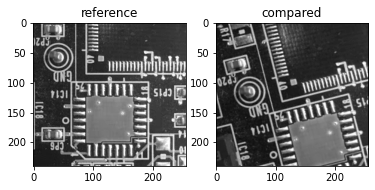

In [3]:
# read monocular image
ref = cv2.imread('imgs/ref.png',0)
cmp = cv2.imread('imgs/cmp.png',0)

plt.subplot(121)
plt.imshow(ref,cmap='gray')
plt.title("reference")
plt.subplot(122)
plt.imshow(cmp,cmap='gray')
plt.title("compared")


Init the image matching class

In [4]:
# initialization
result = imregpoc.imregpoc(ref,cmp)

get transformation matrix

In [5]:
result.getPerspective()

array([[ 1.0249531 ,  0.25988945, -2.1927872 ],
       [-0.25988945,  1.0249531 , 67.63276   ],
       [ 0.        ,  0.        ,  1.        ]], dtype=float32)

get transformation parameter
[ dx
  dy
  $\theta$
  scale]

In [6]:
result.getParam()

[22.016037, 44.257397, 0.24832858, 1.057388973119825]

check wheather this extraction is valid or not

In [7]:
result.isSucceed()

1

show stitched image

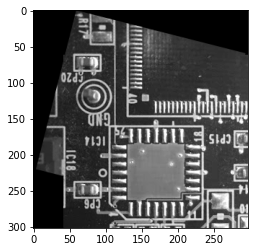

In [8]:
result.stitching()

## Feature point based matching module test

Matched Points Number:388


([array([20.80413765]),
  array([41.64200086]),
  14.17869056654638,
  1.059707047564697],
 159,
 158)

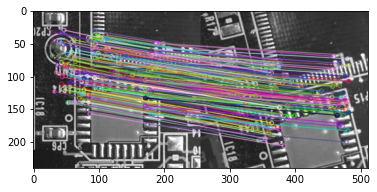

In [9]:
# initialization (SIFT can be changed to other descriptor)
matcher = imregpoc.TempMatcher(ref,'AKAZE')
matcher.match(cmp,1)

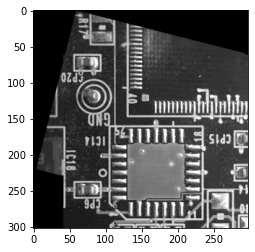

In [10]:
# perspective transformation matrix (Homography matrix)
matcher.getPerspective()
# stitching two images based on the matching result
matcher.stitching()

## Debug


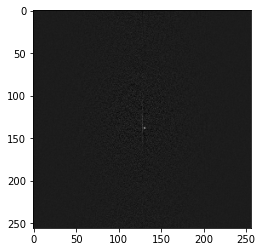

In [11]:
result.showRotatePeak()

### try zeropadding

- 外側に0埋めすればPerspectiveは外のでOK。
- この場合Affineもそういうふうに計算する。
- POCへの変換はどうする？

(256, 256)

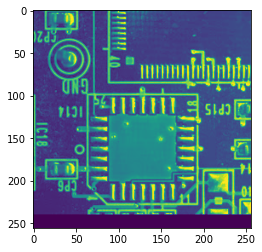

In [29]:
ref_pad = np.pad(ref,[(0,256-ref.shape[0]),(0,256-ref.shape[1])],'constant')

plt.imshow(ref_pad)
ref_pad.shape

In [30]:
cmp_pad = np.pad(cmp,[(0,256-ref.shape[0]),(0,256-ref.shape[1])],'constant')

res_pad = imregpoc.imregpoc(ref_pad,cmp_pad)

In [25]:
res_pad.isSucceed()

1

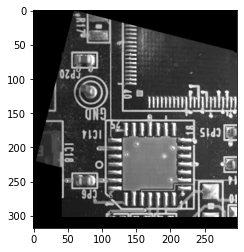

In [31]:
res_pad.stitching()

In [33]:
res_pad.getAffine()

array([[ 1.0249531 ,  0.25988945, -2.1927872 ],
       [-0.25988945,  1.0249531 , 67.63276   ]], dtype=float32)

In [34]:
res_pad.getPerspective()

array([[ 1.0249531 ,  0.25988945, -2.1927872 ],
       [-0.25988945,  1.0249531 , 67.63276   ],
       [ 0.        ,  0.        ,  1.        ]], dtype=float32)

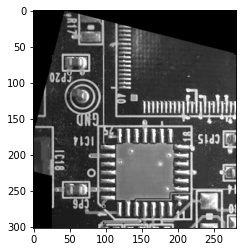

In [35]:
result.stitching(perspective=res_pad.getPerspective())

In [52]:
persp = res_pad.getPerspective()

cx,cy = res_pad.center
Center = np.float32([[1,0,cx],[0,1,cy],[0,0,1]])
iCenter = np.float32([[1,0,-cx],[0,1,-cy],[0,0,1]])

pocmatrix = np.dot(np.dot(iCenter,persp),Center)
dxy = np.dot(np.linalg.inv(pocmatrix[0:2,0:2]),pocmatrix[0:2,2])
scale = np.sqrt(pocmatrix[0,0]**2+pocmatrix[0,1]**2) 
theta = np.arctan2(pocmatrix[0,1],pocmatrix[0,0])

print(dxy,scale,theta)

[22.68233  42.397846] 1.057388973119825 0.24832858


In [41]:
res_pad.getParam()

[22.682321129552477,
 42.397841725120585,
 0.24832856805625173,
 1.057388996929407]

In [50]:
res_pad.poc2warp(res_pad.center,res_pad.getParam())

array([[ 1.0249531 ,  0.25988945, -2.1927872 ],
       [-0.25988945,  1.0249531 , 67.63276   ],
       [ 0.        ,  0.        ,  1.        ]], dtype=float32)

In [49]:
res_pad.poc2warp(res_pad.center,[dxy[0],dxy[1],theta,scale])

array([[ 1.0249531 ,  0.25988945,  1.8531837 ],
       [-0.25988945,  1.0249531 , 72.06763   ],
       [ 0.        ,  0.        ,  1.        ]], dtype=float32)

In [44]:
def warp2poc(self,center,perspective):
    cx,cy = center
    Center = np.float32([[1,0,cx],[0,1,cy],[0,0,1]])
    iCenter = np.float32([[1,0,-cx],[0,1,-cy],[0,0,1]])

    pocmatrix = np.dot(np.dot(iCenter,persp),Center)
    dxy = np.dot(np.linalg.inv(pocmatrix[0:2,0:2]),pocmatrix[0:2,2])
    scale = np.sqrt(pocmatrix[0,0]**2+pocmatrix[0,1]**2) 
    theta = np.arctan2(pocmatrix[0,1],pocmatrix[0,0])
    return [dxy[0],dxy[1],theta,scale]

array([[ 1.0249531 ,  0.25988945, -2.1927872 ],
       [-0.25988945,  1.0249531 , 67.63276   ],
       [ 0.        ,  0.        ,  1.        ]], dtype=float32)

In [54]:
max(ref.shape)

256